# installing Packages

In [8]:

%pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


# Importing Packages

In [9]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp



# Keypoints Using MP Holistic

In [13]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [18]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [20]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [32]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():

    ret,frame = cap.read()
    image,results=mediapipe_detection(frame,holistic)
    print(results)

    cv2.imshow("openCV Feed",frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [33]:
frame

array([[[247, 254, 255],
        [244, 251, 255],
        [242, 249, 255],
        ...,
        [165, 105,  52],
        [165, 104,  51],
        [166, 103,  49]],

       [[243, 252, 255],
        [241, 250, 255],
        [239, 248, 255],
        ...,
        [165, 105,  52],
        [164, 103,  50],
        [163, 101,  47]],

       [[239, 249, 255],
        [238, 248, 255],
        [237, 247, 254],
        ...,
        [164, 104,  52],
        [162, 101,  48],
        [160,  99,  46]],

       ...,

       [[178, 193, 186],
        [178, 193, 186],
        [180, 194, 187],
        ...,
        [150, 164, 162],
        [152, 165, 163],
        [153, 165, 164]],

       [[178, 191, 185],
        [178, 191, 185],
        [180, 192, 186],
        ...,
        [151, 165, 163],
        [152, 165, 164],
        [152, 163, 163]],

       [[179, 190, 184],
        [180, 191, 185],
        [179, 191, 185],
        ...,
        [151, 165, 163],
        [150, 163, 162],
        [150, 161, 162]]

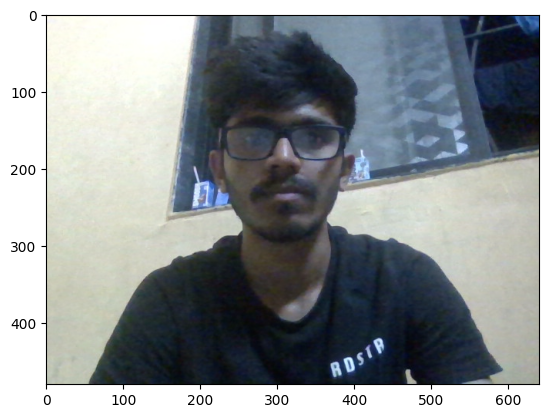

In [34]:
 plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))  